# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




In [1]:
#importing libraries to be used in assignment
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# [1]. Reading Data

In [2]:
# Loading Pre-Processed data( Reviews ) from database
conn = sqlite3.connect('final_database.sqlite')
data = pd.read_sql_query('''SELECT * FROM Reviews''',conn)

In [3]:
data.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...


In [4]:
# Sorting data in ascending order wrt time
data["Time"] = pd.to_datetime(data["Time"], unit = "s")
data = data.sort_values(by = "Time")

In [5]:
data["Score"].value_counts()

positive    307061
negetive     57110
Name: Score, dtype: int64

In [6]:
def Partition(x):
    if x == "positive":
        return 1
    else:
        return 0
    
actual_score = data['Score']
pone = actual_score.map(Partition)
data['Score'] = pone

data.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,1999-10-08,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
30,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,1999-10-25,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
424,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,1999-12-02,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...


In [7]:
data["Score"].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

In [8]:
X = data["CleanText"]
y = data["Score"]

In [22]:
#Splitting sampe data in train and test dataset in  70:30
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
#encoded_labels =data["Score"].map(lambda x: 1 if x == 'positive' else 0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 0)
print(X_train.shape, X_test.shape)

(254919,) (109252,)


In [23]:
#Sampling 100k data pts in 70:30 train test

X_tr = X_train.iloc[1:70001]
y_tr = y_train.iloc[1:70001]
Xt = X_test.iloc[1:30001]
yt = y_test.iloc[1:30001]

print(X_tr.shape,Xt.shape)

(70000,) (30000,)


# [2]. Featuraization

### [2.1] BOW

In [12]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tr = count_vect.fit_transform(X_tr)
Xt = count_vect.transform(Xt)

print("the type of count vectorizer ",type(X_tr))
print("the shape of out text BOW vectorizer ",X_tr.get_shape())
print("the number of unique words ", X_tr.get_shape()[1])

print("the shape of out text BOW vectorizer ",Xt.get_shape())
print("the number of unique words ", Xt.get_shape()[1])

print("the shape of out text BOW vectorizer ",Xt.get_shape())
print("the number of unique words ", Xt.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (70000, 61998)
the number of unique words  61998
the shape of out text BOW vectorizer  (30000, 61998)
the number of unique words  61998
the shape of out text BOW vectorizer  (30000, 61998)
the number of unique words  61998


### [2.2] tf-idf

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer()
Xtr = tf_idf_vect.fit_transform(X_tr)
X_t = tf_idf_vect.transform(Xt)

### [2.3] word2vec

In [24]:
# Trainning Word2Vec model using own text corpus
i=0
list_of_sent=[]
for sent in X_tr.values: 
    list_of_sent.append(sent.split())
    
# Trainning Word2Vec model using own text corpus
i=0
list_of_sent_test=[]
for sent in Xt.values: 
    list_of_sent_test.append(sent.split())
    
# min_count = 5 considers only words that occured atleast 5 times
import warnings
warnings.filterwarnings("ignore")

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=3)

w2v_words = list(w2v_model.wv.vocab)

### [2.3.1] Avg. word2vec

In [12]:
# training data
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))
X_tr = sent_vectors

#testing data
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_test: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))
Xt = sent_vectors_test

70000
50
30000
50


### [2.3.2] tfidf word2vec

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(X_tr)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
from tqdm import tqdm

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

train = tfidf_sent_vectors

# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
from tqdm import tqdm

tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1
    
test = tfidf_sent_vectors_test

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [01:03<00:00, 472.78it/s]


# [3] Assignment 9: Random Forests

<ol>
    <li><strong>Apply Random Forests & GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Get top 20 important features and represent them in a word cloud. Do this for BOW & TFIDF.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>(or)</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

## [3.1] Applying RF

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from seaborn import heatmap

base_learners = [50,60,70,90,100]
depth = [35,45,55,60,65]
# function to calculate hyperparameter using GridSearchCV
def RF(X_train,y_train,X_test, y_test):
    param_grid = [{'n_estimators': base_learners,'max_depth': depth}]
    tscv = TimeSeriesSplit(n_splits=3)
    
    model = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, scoring = 'f1_weighted', cv=tscv)
    model.fit(X_train, y_train)
    
    # Optimal value of n_estimators
    optimal_est = model.best_estimator_.n_estimators
    print("The optimal value of n_estimator is : ",optimal_est)
    
    # Optimal value of depth
    optimal_depth = model.best_estimator_.max_depth
    print("The optimal value of depth is : ",optimal_depth)
    
    x1=depth
    x2=base_learners
    y = model.cv_results_['mean_test_score']
    y = np.reshape(y,(5,5))
    
    sns.heatmap(y, annot=True, fmt="g", cmap='viridis',xticklabels=x1, yticklabels=x2)
    plt.show()

    print(model.best_estimator_)
    print("\nF1 score is :")
    print(model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    print("\nConfusion Matrix :")
    print(cm)
    plt.figure()
    heatmap = sns.heatmap(cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("CONFUSION MATRIX ")
    plt.show()
    
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    print('\n****Test accuracy  is %d%%' % (acc))
    
    prs = precision_score(yt, pred, average='weighted')
    print("\nprecision score is "+str(prs))
    
    rcs = recall_score(yt, pred, average='weighted')
    print("\nrecall score is "+str(rcs))
    


In [86]:
#function to find top feaures
from wordcloud import WordCloud, STOPWORDS
def show_most_informative_features(vectorizer,e,d,n=25):
   
    RT = RandomForestClassifier(n_estimators=e,max_depth=d,n_jobs=-1)
    RT.fit(Xtr,y_tr)

    # Calculate feature importances from decision trees
    importances = RT.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1][:25]
    
    # Rearrange feature names so they match the sorted feature importances
    names = vectorizer.get_feature_names()
    
    wrds=[]

    for i in indices:
        wrds.append(names[i])
        
    print(wrds)
        
    wordcloud_n = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(str(wrds))
  
    # plot the WordCloud image                        
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud_n) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title('TOP features')
  
    plt.show()

### [3.1.1] Applying Random Forests on BOW,<font color='red'> SET 1</font>

The optimal value of n_estimator is :  50
The optimal value of depth is :  65


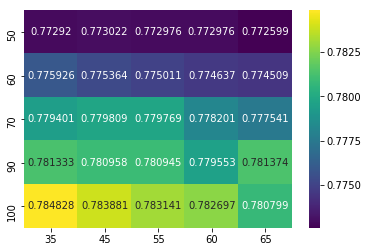

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=65, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

F1 score is :
0.7862165552138713

Confusion Matrix :
[[  220  4531]
 [    7 25242]]


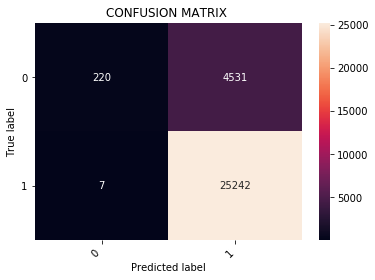


****Test accuracy  is 84%

precision score is 0.8670325907837241

recall score is 0.8487333333333333


In [20]:
# Please write all the code with proper documentation
RF(X_tr,y_tr,Xt,yt)

### [2.1.2] Wordcloud of top 20 important features from<font color='red'> SET 1</font>

['disappoint', 'return', 'wast', 'great', 'money', 'aw', 'terribl', 'love', 'worst', 'bad', 'best', 'tast', 'would', 'stale', 'refund', 'horribl', 'receiv', 'good', 'product', 'threw', 'review', 'perfect', 'unfortun', 'didnt', 'thought']


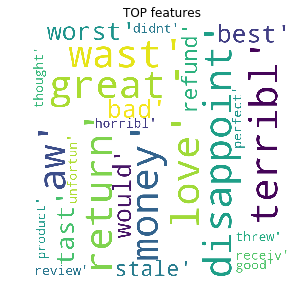

In [75]:
# Please write all the code with proper documentation
show_most_informative_features(count_vect,50,70)

### [2.1.3] Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

The optimal value of n_estimator is :  50
The optimal value of depth is :  65


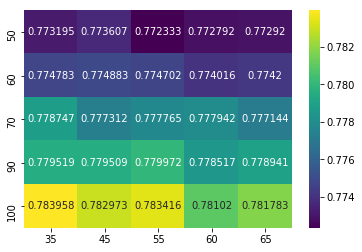

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=65, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

F1 score is :
0.7826138508928321

Confusion Matrix :
[[  171  4580]
 [    2 25247]]


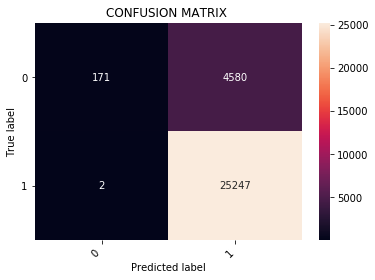


****Test accuracy  is 84%

precision score is 0.8689345630192556

recall score is 0.8472666666666666


In [31]:
# Please write all the code with proper documentation
RF(Xtr,y_tr,X_t,yt)

### [2.1.4] Wordcloud of top 20 important features from<font color='red'> SET 2</font>

['disappoint', 'love', 'wast', 'return', 'worst', 'great', 'money', 'horribl', 'terribl', 'tast', 'best', 'would', 'bad', 'disgust', 'product', 'didnt', 'aw', 'thought', 'unfortun', 'good', 'review', 'perfect', 'stale', 'threw', 'item']


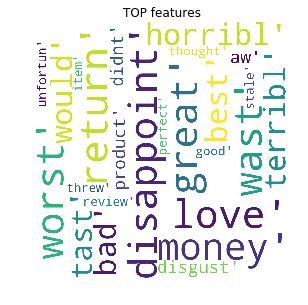

In [87]:
# Please write all the code with proper documentation
show_most_informative_features(tf_idf_vect,60,65)

### [2.1.5] Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

The optimal value of n_estimator is :  50
The optimal value of depth is :  45


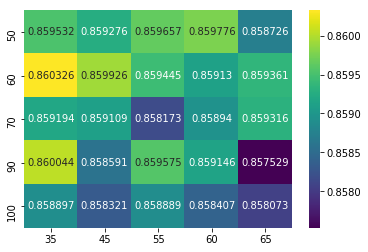

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=45, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

F1 score is :
0.8595423205382001

Confusion Matrix :
[[ 1615  3136]
 [  464 24785]]


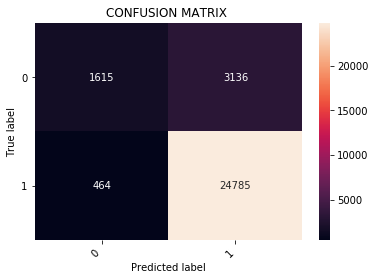


****Test accuracy  is 88%

precision score is 0.8701254165557019

recall score is 0.88


In [14]:
# Please write all the code with proper documentation
RF(X_tr,y_tr,Xt,yt)

### [2.1.6] Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

The optimal value of n_estimator is :  50
The optimal value of depth is :  55


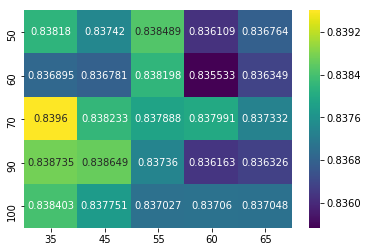

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=55, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

F1 score is :
0.8397942838484482

Confusion Matrix :
[[ 1193  3558]
 [  374 24875]]


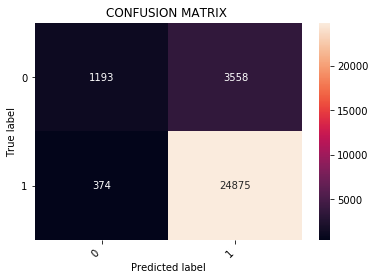


****Test accuracy  is 86%

precision score is 0.8568833433753393

recall score is 0.8689333333333333


In [26]:
# Please write all the code with proper documentation
RF(train,y_tr,test,yt)

## [2.2] Applying GBDT using XGBOOST

In [24]:
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from seaborn import heatmap

base_learners = [100,120,130,140,150]
lr  = [0.1,0.15,0.2,0.25,0.3]
# function to calculate hyperparameter using GridSearchCV
def GBT(X_train,y_train,X_test, y_test):
    param_grid = [{'learning_rate': lr,'n_estimators': base_learners}]
    tscv = TimeSeriesSplit(n_splits=3)
    
    model = GridSearchCV(XGBClassifier(), param_grid, scoring = 'f1_weighted', cv=tscv)
    model.fit(X_train, y_train)
    
    # Optimal value of n_estimators
    optimal_est = model.best_estimator_.n_estimators
    print("The optimal value of n_estimator is : ",optimal_est)
    
    # Optimal value of depth
    optimal_lr = model.best_estimator_.learning_rate
    print("The optimal value of learning rate is : ",optimal_lr)
    
    x1=lr
    x2=base_learners
    y= model.cv_results_['mean_test_score']

    print(model.best_estimator_)
    print("\nF1 score is :")
    print(model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    print("\nConfusion Matrix :")
    print(cm)
    plt.figure()
    heatmap = sns.heatmap(cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("CONFUSION MATRIX ")
    
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    print('\n****Test accuracy  is %d%%' % (acc))
    
    prs = precision_score(yt, pred, average='weighted')
    print("\nprecision score is "+str(prs))
    
    rcs = recall_score(yt, pred, average='weighted')
    print("\nrecall score is "+str(rcs))


### [2.2.1] Applying XGBOOST on BOW,<font color='red'> SET 1</font>

The optimal value of n_estimator is :  150
The optimal value of learning rate is :  0.3
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

F1 score is :
0.885448094840612

Confusion Matrix :
[[ 2089  2662]
 [  357 24892]]

****Test accuracy  is 89%

precision score is 0.8955755345804972

recall score is 0.8993666666666666


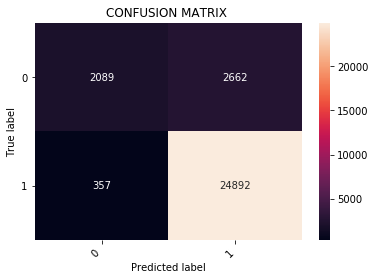

In [101]:
# Please write all the code with proper documentation
GBT(X_tr,y_tr,Xt,yt)

### [2.2.2] Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

The optimal value of n_estimator is :  150
The optimal value of learning rate is :  0.3
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

F1 score is :
0.887521764395052

Confusion Matrix :
[[ 2134  2617]
 [  357 24892]]

****Test accuracy  is 90%

precision score is 0.8972368478752476

recall score is 0.9008666666666667


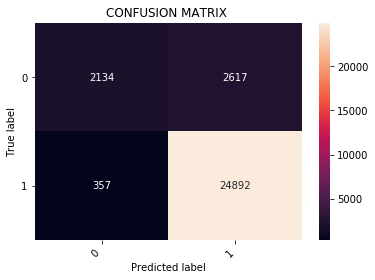

In [112]:
# Please write all the code with proper documentation
GBT(Xtr,y_tr,X_t,yt)

### [2.2.3] Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

The optimal value of n_estimator is :  150
The optimal value of learning rate is :  0.25
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.25, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

F1 score is :
0.8801751046525857

Confusion Matrix :
[[ 2262  2489]
 [  804 24445]]

****Test accuracy  is 89%

precision score is 0.8806951189399654

recall score is 0.8902333333333333


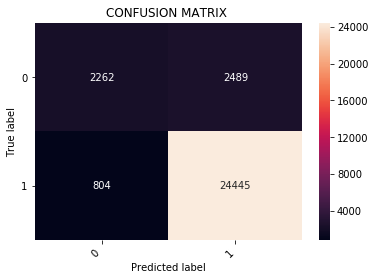

In [25]:
# Please write all the code with proper documentation
X_tr = np.array(X_tr)
Xt = np.array(Xt)
GBT(X_tr,y_tr,Xt,yt)

### [2.2.4] Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

The optimal value of n_estimator is :  150
The optimal value of learning rate is :  0.3
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

F1 score is :
0.8660551370022459

Confusion Matrix :
[[ 1912  2839]
 [  744 24505]]

****Test accuracy  is 88%

precision score is 0.8682553890077572

recall score is 0.8805666666666667


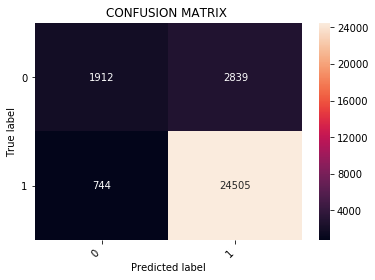

In [37]:
# Please write all the code with proper documentation
train = np.array(train)
test = np.array(test)
GBT(train,y_tr,test,yt)

# [3] Conclusions

<strong> Random Forests </strong>

In [6]:
table = {'Technique':['BoW', "TFIDF","Avg_w2v","tf-idf_w2v"],'F1 score':[0.7862,0.7826,0.8595,0.8397],'depth ':[65,65,45,55],'n_estimator':[50,50,50,50] }
df = pd.DataFrame(data=table)
df

,Technique,F1 score,depth,n_estimator
0,BoW,0.7862,65,50
1,TFIDF,0.7826,65,50
2,Avg_w2v,0.8595,45,50
3,tf-idf_w2v,0.8397,55,50


    --In Random Forest , Avg w2v performed best and tf-idf performed poorly
    --We can get feature importance directly in Random Forest

<strong> XGBOOST </strong>

In [8]:
table = {'Technique':['BoW', "TFIDF","Avg_w2v","tf-idf_w2v"],'F1 score':[0.8854,0.8875,0.8801,0.8660],'learning rate ':[0.3,0.3,0.25,0.3],'n_estimator':[150,150,150,150] }
df = pd.DataFrame(data=table)
df

,Technique,F1 score,learning rate,n_estimator
0,BoW,0.8854,0.30,150
1,TFIDF,0.8875,0.30,150
2,Avg_w2v,0.8801,0.25,150
3,tf-idf_w2v,0.8660,0.30,150


    --In XGBOOST, tf-idf performed slightly well in comparison to others

XGBOOST performed Better in comparison to Random Forests

In [9]:
print("end")

end


In [10]:
print("END of 09")

END of 09
